In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Test

# Print out first 7 data:
df=pd.read_csv("hour.csv")
df.head(7)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Start,End,Duration
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,NaN,NaN,NaN
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,NaN,NaN,NaN
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,NaN,NaN,NaN
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,NaN,NaN,NaN
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,NaN,NaN,NaN
5,6,1/1/2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,NaN,NaN,NaN
6,7,1/1/2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,NaN,NaN,NaN


In [6]:
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
# Checking the size of the dataset:
print(len(df.columns))
print(len(df.index))

20
17379


In [8]:
# Checking the specific date.
print('temp on a specific date:')
print(df[df['dteday']=='1/1/2011']['temp'])

temp on a specific date:
0     0.24
1     0.22
2     0.22
3     0.24
4     0.24
5     0.24
6     0.22
7     0.20
8     0.24
9     0.32
10    0.38
11    0.36
12    0.42
13    0.46
14    0.46
15    0.44
16    0.42
17    0.44
18    0.42
19    0.42
20    0.40
21    0.40
22    0.40
23    0.46
Name: temp, dtype: float64


In [9]:
np.corrcoef(df[df['dteday']=='1/1/2011']['temp'],df[df['dteday']=='1/1/2011']['cnt'])

array([[ 1.        ,  0.75059529],
       [ 0.75059529,  1.        ]])

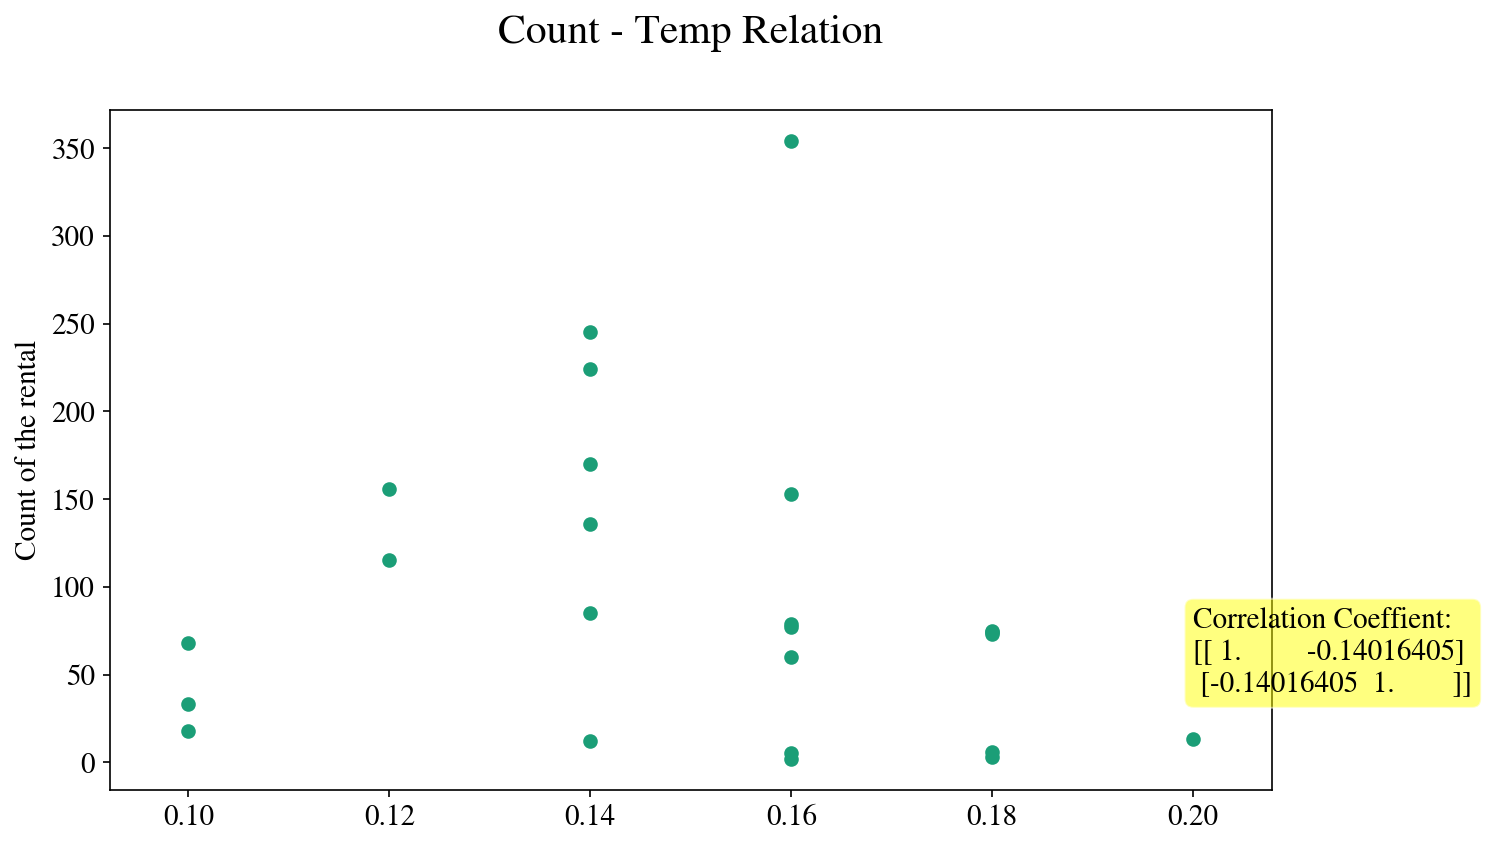

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ax1.scatter(df[df['dteday']=='1/3/2012']['temp'],df[df['dteday']=='1/3/2012']['cnt'])
ax1.set_ylabel("Count of the rental")
ax1.set_xlabel("")
ax1.set_title("Count - Temp Relation", y=1.08, x=0.5, fontsize = 20)
ax1.annotate('Correlation Coeffient: \n{}'.format(np.corrcoef(df[df['dteday']=='1/3/2012']['temp'],df[df['dteday']=='1/3/2012']['cnt'])),
                     xy=(0.2,40), bbox=dict(boxstyle='round', fc='yellow', alpha=0.5))

plt.show()

In [12]:
# Checking temperature - counts relation with constant weekday:
weekday = set(df['weekday'])

for day in weekday:
    print("Correlation Coefficient for weekday {} is \n{}". format(day, np.corrcoef(df[df['weekday']==day]['temp'],df[df['weekday']==day]['cnt'])))
    


Correlation Coefficient for weekday 0 is 
[[ 1.          0.50644602]
 [ 0.50644602  1.        ]]
Correlation Coefficient for weekday 1 is 
[[ 1.          0.38250787]
 [ 0.38250787  1.        ]]
Correlation Coefficient for weekday 2 is 
[[ 1.          0.34687779]
 [ 0.34687779  1.        ]]
Correlation Coefficient for weekday 3 is 
[[ 1.          0.36282241]
 [ 0.36282241  1.        ]]
Correlation Coefficient for weekday 4 is 
[[ 1.          0.34538431]
 [ 0.34538431  1.        ]]
Correlation Coefficient for weekday 5 is 
[[ 1.          0.38507846]
 [ 0.38507846  1.        ]]
Correlation Coefficient for weekday 6 is 
[[ 1.          0.51183697]
 [ 0.51183697  1.        ]]


In [44]:
# Checking temperature - counts relation with constant weekday and without holiday factors:
weekday = set(df['weekday'])

for day in weekday:
    if df['holiday'] == 0:
        print("Correlation Coefficient for weekday {} is \n{}". format(day, np.corrcoef(df[df['weekday']==day]['temp'],df[df['weekday']==day]['cnt'])))
    


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

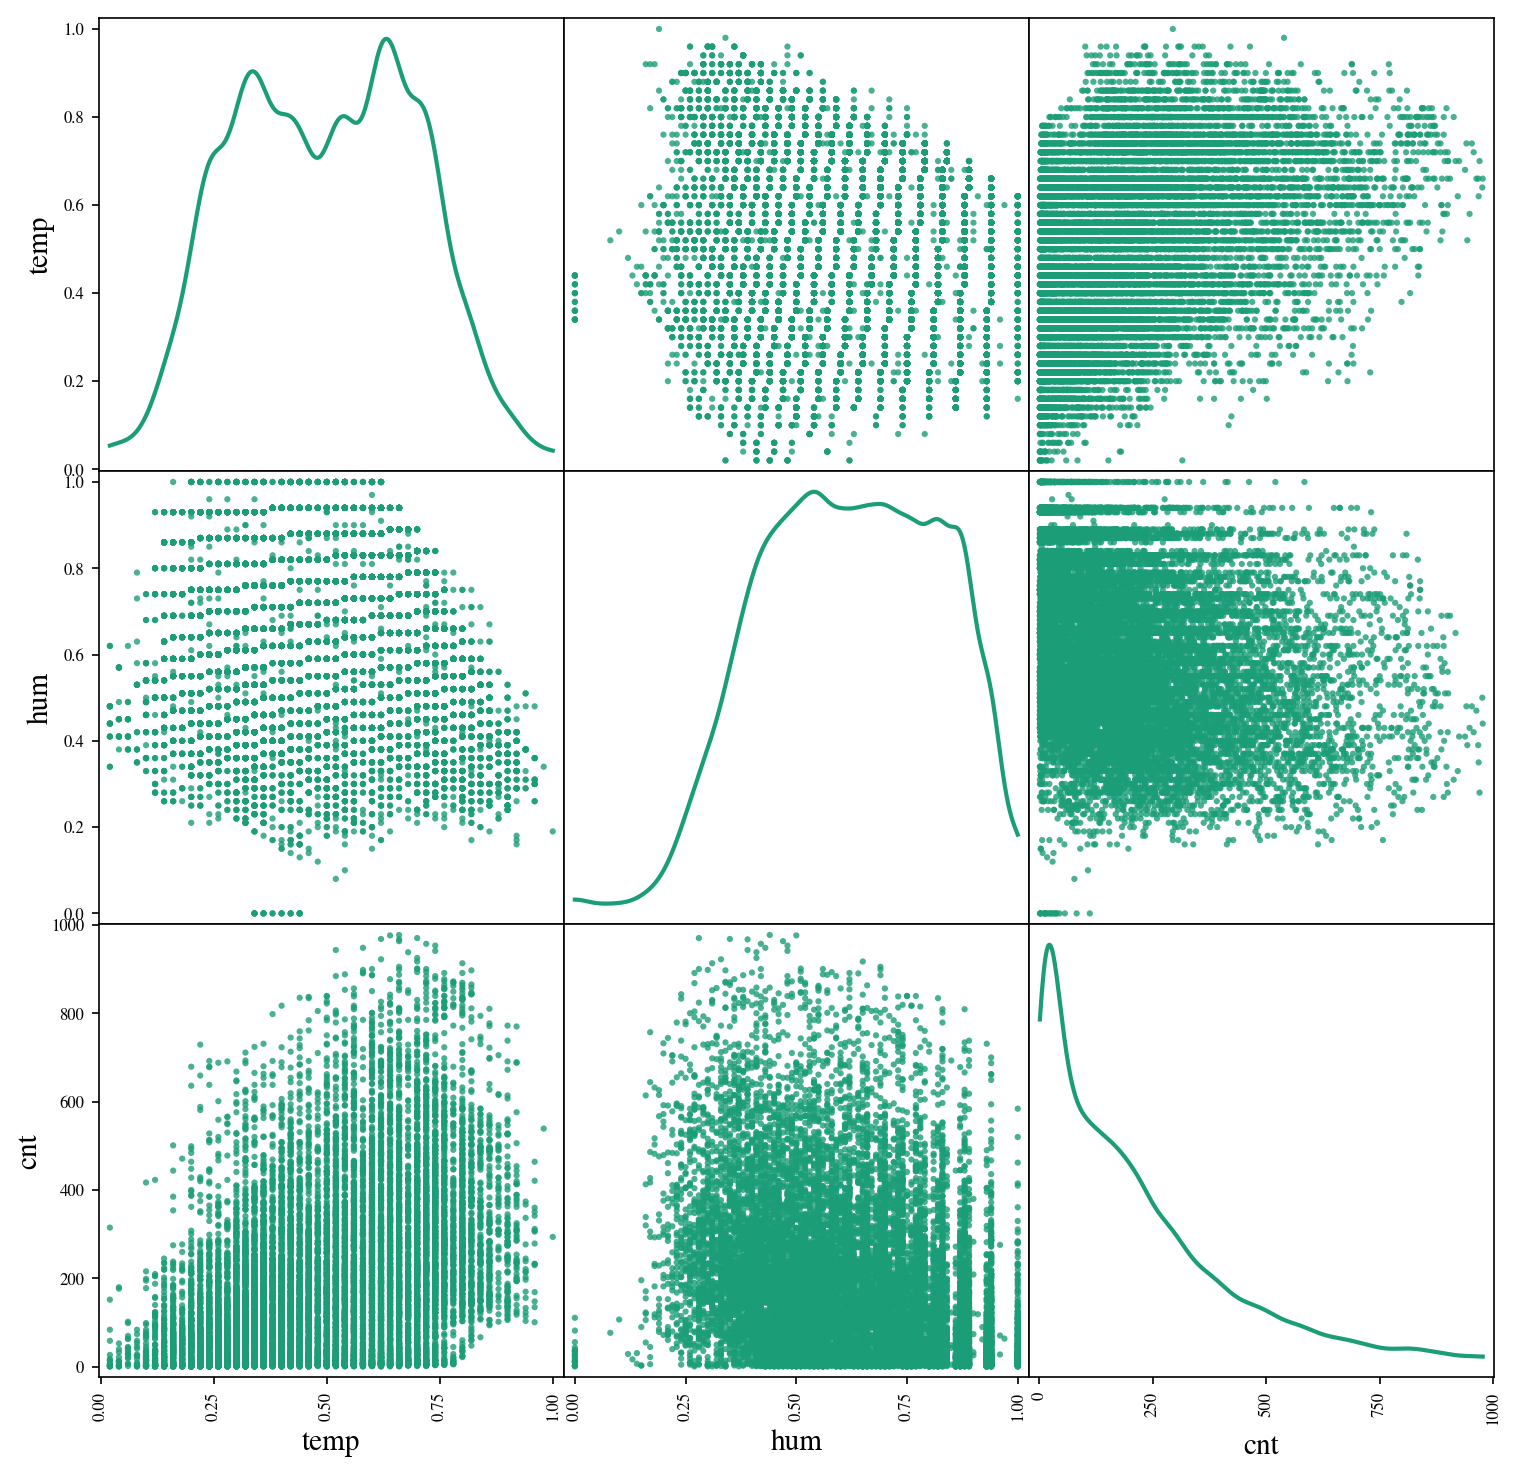

In [13]:
smaller_frame=df[['temp', 'hum', 'cnt']]
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)
    
plt.show()

In [14]:
print(smaller_frame.corr())

          temp       hum       cnt
temp  1.000000 -0.069881  0.404772
hum  -0.069881  1.000000 -0.322911
cnt   0.404772 -0.322911  1.000000
